# Mental Health Analysis Project

## Aim:
**Build a predictive model to identify factors associated with frequent mental distress among older adults.**

## Question:
**What factors are associated with frequent mental distress among older adults?**

## Objectives:
1. **Identify key demographic and health-related predictors of mental distress.**
2. **Build and validate a predictive model.**
3. **Interpret the results and provide actionable insights.**

## Potential Analyses:

### 1. Identify Demographic Groups Most Affected by Frequent Mental Distress:
   - **Age Groups**: The analysis will examine which age ranges (e.g., 50-64 years, 65+ years) report higher levels of frequent mental distress.
   - **Race**: The impact of racial/ethnic backgrounds on mental distress will be analyzed.
   - **Gender**: The prevalence of mental distress between male and female older adults will be compared.

### 2. Explore Geographic Variations in Mental Distress Percentages:
   - **State-Level Analysis**: States with higher and lower percentages of older adults experiencing frequent mental distress will be identified.
   - **Urban vs. Rural**: Differences in mental distress rates between urban and rural areas will be investigated.

### 3. Analyze Correlations Between Mental Distress and Other Health Indicators:
   - **Physical Activity Limitations**: The relationship between physical activity limitations and mental distress will be studied.
   - **Self-Rated Health**: How self-rated health status correlates with mental distress will be explored.
   - **Other Health Factors**: Additional health indicators, such as chronic conditions, disability status, and access to healthcare, will be considered.

## Steps:

### 1. Data Preparation:
   - **Cleaning**: Missing values and outliers will be handled.
   - **Feature Engineering**: New features will be created based on existing data (e.g., age groups, interaction terms).
   - **Normalization**: Data will be standardized or normalized to ensure consistency.

### 2. Exploratory Data Analysis (EDA):
   - **Descriptive Statistics**: Mean, median, and standard deviation will be calculated.
   - **Visualizations**: Histograms, bar plots, and scatter plots will be created to identify patterns and relationships.
   - **Correlation Analysis**: Correlations between variables will be identified using heatmaps and correlation coefficients.

### 3. Model Building:
   - **Splitting the Data**: The dataset will be split into training and testing sets.
   - **Model Selection**: Appropriate models (e.g., logistic regression, decision trees, random forest) will be chosen.
   - **Hyperparameter Tuning**: Model parameters will be optimized using techniques like grid search or random search.

### 4. Model Validation:
   - **Performance Metrics**: Model performance will be evaluated using metrics such as accuracy, precision, recall, and F1 score.
   - **Cross-Validation**: Cross-validation techniques will be used to ensure model generalizability.

### 5. Interpretation & Reporting:
   - **Feature Importance**: The most important features influencing mental distress will be identified and interpreted.
   - **Actionable Insights**: Recommendations based on model findings will be provided.
   - **Report**: A comprehensive report documenting the methodology, results, and conclusions will be compiled.

## Data Source:
**The data for this project will be sourced from the Alzheimer’s Disease and Healthy Aging Data dataset.**

## Tools & Technologies:
- **Programming Languages**: Python (pandas, numpy, scikit-learn)
- **Visualization Libraries**: Matplotlib, Seaborn
- **Machine Learning Libraries**: Scikit-learn, XGBoost


# Data wrangling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
data = pd.read_csv("Alzheimer_s_Disease_and_Healthy_Aging_Data_20241111.csv")

In [3]:
data['Class'].unique()

array(['Mental Health', 'Overall Health', 'Caregiving',
       'Nutrition/Physical Activity/Obesity', 'Screenings and Vaccines',
       'Smoking and Alcohol Use', 'Cognitive Decline'], dtype=object)

In [4]:
data.head(2)

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE,2022,2022,PA,Pennsylvania,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Native Am/Alaskan Native,POINT (-77.86070029 40.79373015),C05,TMC01,Q03,42,AGE,5064,RACE,NAA
1,BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE,2022,2022,SD,South Dakota,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Asian/Pacific Islander,POINT (-100.3735306 44.35313005),C05,TMC01,Q03,46,AGE,65PLUS,RACE,ASN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284142 entries, 0 to 284141
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RowId                       284142 non-null  object 
 1   YearStart                   284142 non-null  int64  
 2   YearEnd                     284142 non-null  int64  
 3   LocationAbbr                284142 non-null  object 
 4   LocationDesc                284142 non-null  object 
 5   Datasource                  284142 non-null  object 
 6   Class                       284142 non-null  object 
 7   Topic                       284142 non-null  object 
 8   Question                    284142 non-null  object 
 9   Data_Value_Unit             284142 non-null  object 
 10  DataValueTypeID             284142 non-null  object 
 11  Data_Value_Type             284142 non-null  object 
 12  Data_Value                  192808 non-null  float64
 13  Data_Value_Alt

As the dataset is quite large with many redundant columns, a new DataFrame containing only essential columns will be extracted from the Dataframe. 

In [6]:
pd.DataFrame({
    'Data_Value_Unit': data['Data_Value_Unit'].unique(),
    'DataValueTypeID': data['DataValueTypeID'].unique(),
    'Data_Value_Type': data['Data_Value_Type'].unique()
})

#As these three variables hold identical information, only one of them, Data_Value_Type, 
#will be selected for the future DataFrame.

,Data_Value_Unit,DataValueTypeID,Data_Value_Type
0,%,PRCTG,Percentage
1,Number,MEAN,Mean


In [7]:
essential_columns = [
    'YearStart',
    'YearEnd',
    'LocationDesc',
    'Class',
    'Topic',
    'Question',
    'Data_Value_Type',
    'Data_Value',
    'Low_Confidence_Limit',
    'High_Confidence_Limit',
    'Stratification1',
    'Stratification2',
    'StratificationCategoryID2'
]

df = data[essential_columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284142 entries, 0 to 284141
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  284142 non-null  int64  
 1   YearEnd                    284142 non-null  int64  
 2   LocationDesc               284142 non-null  object 
 3   Class                      284142 non-null  object 
 4   Topic                      284142 non-null  object 
 5   Question                   284142 non-null  object 
 6   Data_Value_Type            284142 non-null  object 
 7   Data_Value                 192808 non-null  float64
 8   Low_Confidence_Limit       192597 non-null  float64
 9   High_Confidence_Limit      192597 non-null  float64
 10  Stratification1            284142 non-null  object 
 11  Stratification2            247269 non-null  object 
 12  StratificationCategoryID2  284142 non-null  object 
dtypes: float64(3), int64(2), obje

In [9]:
# To gain a deeper understanding of the data, creating a pivot table 
#where each 'LocationDesc' is a column and counts are grouped by 'Topic'
pivot_df = data.pivot_table(index='Topic', columns='LocationDesc', aggfunc='size', fill_value=0)

# Display the resulting dataframe
pivot_df

LocationDesc,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,"United States, DC & Territories",Utah,Vermont,Virgin Islands,Virginia,Washington,West,West Virginia,Wisconsin,Wyoming
Topic,,,,,,,,,,,,,,,,,,,,,
Arthritis among older adults,144,144,144,144,144,144,144,144,144,120,...,144,144,144,48,144,144,144,144,144,144
Binge drinking within past 30 days,192,192,192,192,192,192,192,192,192,168,...,192,192,192,72,192,192,192,192,191,192
Cholesterol checked in past 5 years,96,96,96,96,96,96,96,96,96,72,...,96,96,96,24,96,96,96,96,96,96
Colorectal cancer screening,96,96,96,96,96,96,96,96,96,96,...,96,96,96,47,96,96,96,96,95,96
Current smoking,192,192,192,192,192,192,192,192,192,168,...,192,192,192,72,192,192,192,192,191,192
Diabetes screening within past 3 years,192,144,72,24,24,0,48,144,119,120,...,192,24,72,72,168,96,192,192,167,72
"Disability status, including sensory or mobility limitations",168,168,168,168,168,168,168,168,168,144,...,168,168,168,72,168,168,168,168,167,168
Duration of caregiving among older adults,71,72,57,69,71,54,70,44,21,48,...,216,145,40,0,80,33,215,87,79,64
Eating 2 or more fruits daily,96,96,96,96,96,96,96,96,96,72,...,96,96,96,24,96,96,96,96,96,96


After creating the pivot table to analyze the data, we observed that the counts of 'LocationDesc' per 'Topic' are consistent across the dataset. This uniformity suggests that the counts do not provide meaningful insights for our analysis. Therefore, we should consider alternative methods or metrics to explore the data more effectively.

In [10]:
df.head(10)

,YearStart,YearEnd,LocationDesc,Class,Topic,Question,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Stratification1,Stratification2,StratificationCategoryID2
0,2022,2022,Pennsylvania,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,Percentage,NaN,NaN,NaN,50-64 years,Native Am/Alaskan Native,RACE
1,2022,2022,South Dakota,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,Percentage,NaN,NaN,NaN,65 years or older,Asian/Pacific Islander,RACE
2,2022,2022,Idaho,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,Percentage,NaN,NaN,NaN,65 years or older,"Black, non-Hispanic",RACE
3,2022,2022,Maryland,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,Percentage,9.0,6.5,12.3,65 years or older,"Black, non-Hispanic",RACE
4,2022,2022,Wisconsin,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,Percentage,5.6,4.4,7.2,65 years or older,Male,GENDER
5,2022,2022,Iowa,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,Percentage,NaN,NaN,NaN,Overall,Asian/Pacific Islander,RACE
6,2022,2022,Oklahoma,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,Percentage,21.5,15.4,29.2,Overall,Native Am/Alaskan Native,RACE
7,2022,2022,Pennsylvania,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,Percentage,10.0,8.3,12.1,Overall,"White, non-Hispanic",RACE
8,2022,2022,Arizona,Overall Health,Recent activity limitations in past month,Mean number of days with activity limitations ...,Mean,6.1,5.4,6.7,65 years or older,"White, non-Hispanic",RACE
9,2022,2022,Ohio,Caregiving,Expect to provide care for someone in the next...,Percentage of older adults currently not provi...,Percentage,14.5,12.0,17.5,50-64 years,Male,GENDER


In [11]:
# Drop rows where 'Data_Value' is null
df = df.dropna(subset=['Data_Value'])

In [12]:
df = df.dropna(subset=['Stratification2'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156041 entries, 3 to 284137
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  156041 non-null  int64  
 1   YearEnd                    156041 non-null  int64  
 2   LocationDesc               156041 non-null  object 
 3   Class                      156041 non-null  object 
 4   Topic                      156041 non-null  object 
 5   Question                   156041 non-null  object 
 6   Data_Value_Type            156041 non-null  object 
 7   Data_Value                 156041 non-null  float64
 8   Low_Confidence_Limit       155830 non-null  float64
 9   High_Confidence_Limit      155830 non-null  float64
 10  Stratification1            156041 non-null  object 
 11  Stratification2            156041 non-null  object 
 12  StratificationCategoryID2  156041 non-null  object 
dtypes: float64(3), int64(2), obje

In [14]:
df = df.dropna(subset=['Low_Confidence_Limit'])

In [15]:
df['LocationDesc'].unique()

array(['Maryland', 'Wisconsin', 'Oklahoma', 'Pennsylvania', 'Arizona',
       'Ohio', 'South', 'Georgia', 'Idaho', 'Northeast', 'Colorado',
       'Arkansas', 'New York', 'South Dakota',
       'United States, DC & Territories', 'Guam', 'Kansas', 'Washington',
       'Vermont', 'Hawaii', 'District of Columbia', 'Alaska', 'Montana',
       'New Mexico', 'Alabama', 'Utah', 'Tennessee', 'Texas',
       'West Virginia', 'Rhode Island', 'Oregon', 'Virginia', 'Nebraska',
       'California', 'Connecticut', 'Massachusetts', 'Mississippi',
       'Louisiana', 'North Carolina', 'New Jersey', 'Wyoming', 'West',
       'Midwest', 'New Hampshire', 'Maine', 'Florida', 'Iowa', 'Missouri',
       'Delaware', 'Michigan', 'North Dakota', 'Minnesota', 'Indiana',
       'Illinois', 'Nevada', 'Puerto Rico', 'Virgin Islands', 'Kentucky',
       'South Carolina'], dtype=object)

In [16]:
# Data sourced from the U.S. Census Bureau
state_list =  [
        'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
        'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois',
        'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
        'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
        'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota',
        'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
        'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
        'West Virginia', 'Wisconsin', 'Wyoming'
    ]

In [17]:
df.rename(columns={'LocationDesc': 'State'}, inplace=True)

In [18]:
df.rename(columns={'Stratification1': 'Age_group'}, inplace=True)

In [19]:
# Filter the DataFrame to keep only rows where 'State' is in state_list
df = df[df['State'].isin(state_list)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126115 entries, 3 to 284137
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  126115 non-null  int64  
 1   YearEnd                    126115 non-null  int64  
 2   State                      126115 non-null  object 
 3   Class                      126115 non-null  object 
 4   Topic                      126115 non-null  object 
 5   Question                   126115 non-null  object 
 6   Data_Value_Type            126115 non-null  object 
 7   Data_Value                 126115 non-null  float64
 8   Low_Confidence_Limit       126115 non-null  float64
 9   High_Confidence_Limit      126115 non-null  float64
 10  Age_group                  126115 non-null  object 
 11  Stratification2            126115 non-null  object 
 12  StratificationCategoryID2  126115 non-null  object 
dtypes: float64(3), int64(2), obje

In [20]:
df.head(2)

,YearStart,YearEnd,State,Class,Topic,Question,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Age_group,Stratification2,StratificationCategoryID2
3,2022,2022,Maryland,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,Percentage,9.0,6.5,12.3,65 years or older,"Black, non-Hispanic",RACE
4,2022,2022,Wisconsin,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,Percentage,5.6,4.4,7.2,65 years or older,Male,GENDER


In [21]:
# Calculate the distribution of categorical variables
categorical_columns = ['State', 'Class', 'Topic', 'Data_Value_Type', 'Age_group', 'Stratification2']
for column in categorical_columns:
    print(f"Distribution of {column}:")
    print(df[column].value_counts())
    print("\n")   

Distribution of State:
New York                3701
Maryland                3085
Texas                   3058
Hawaii                  3049
Washington              3002
Arizona                 2982
California              2955
New Mexico              2829
Oklahoma                2825
Connecticut             2752
Ohio                    2746
Georgia                 2739
Minnesota               2733
New Jersey              2730
Kansas                  2721
Virginia                2720
Florida                 2617
Michigan                2599
Colorado                2566
Nebraska                2560
Indiana                 2555
North Carolina          2552
South Carolina          2517
Illinois                2512
Mississippi             2454
Utah                    2452
Oregon                  2410
Alabama                 2404
Massachusetts           2394
Pennsylvania            2382
Louisiana               2374
Delaware                2333
Missouri                2312
Wisconsin           

In [22]:
df_mental_h = df[df['Class'] == 'Mental Health']
df_mental_h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9895 entries, 3 to 284130
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearStart                  9895 non-null   int64  
 1   YearEnd                    9895 non-null   int64  
 2   State                      9895 non-null   object 
 3   Class                      9895 non-null   object 
 4   Topic                      9895 non-null   object 
 5   Question                   9895 non-null   object 
 6   Data_Value_Type            9895 non-null   object 
 7   Data_Value                 9895 non-null   float64
 8   Low_Confidence_Limit       9895 non-null   float64
 9   High_Confidence_Limit      9895 non-null   float64
 10  Age_group                  9895 non-null   object 
 11  Stratification2            9895 non-null   object 
 12  StratificationCategoryID2  9895 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usag

In [23]:
df_mental_h.head()

,YearStart,YearEnd,State,Class,Topic,Question,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Age_group,Stratification2,StratificationCategoryID2
3,2022,2022,Maryland,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,Percentage,9.0,6.5,12.3,65 years or older,"Black, non-Hispanic",RACE
4,2022,2022,Wisconsin,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,Percentage,5.6,4.4,7.2,65 years or older,Male,GENDER
6,2022,2022,Oklahoma,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,Percentage,21.5,15.4,29.2,Overall,Native Am/Alaskan Native,RACE
7,2022,2022,Pennsylvania,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,Percentage,10.0,8.3,12.1,Overall,"White, non-Hispanic",RACE
107,2022,2022,New Mexico,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,Percentage,19.3,10.5,32.6,50-64 years,Native Am/Alaskan Native,RACE


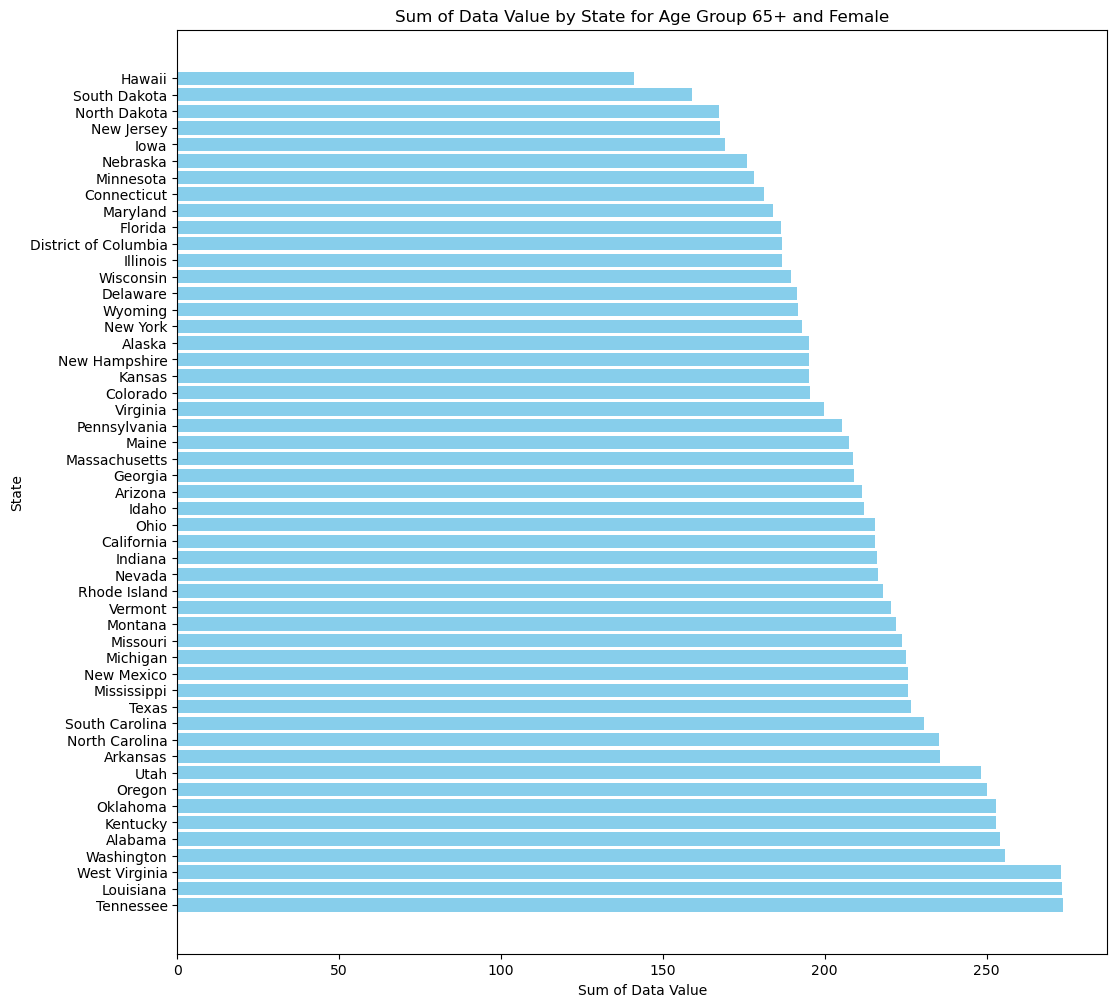

In [24]:
# Filter the dataset
filtered_df = df_mental_h[(df_mental_h['Age_group'] == '65 years or older') & 
                          (df_mental_h['Stratification2'] == 'Female')]

# Group by State and sum Data_Value
state_sum = filtered_df.groupby('State')['Data_Value'].sum().reset_index()

# Sort the dataframe by Data_Value in ascending order
state_sum_sorted = state_sum.sort_values(by='Data_Value', ascending=False)

# Plot the results as a horizontal bar plot
plt.figure(figsize=(12, 12))
plt.barh(state_sum_sorted['State'], state_sum_sorted['Data_Value'], color='skyblue')
plt.xlabel('Sum of Data Value')
plt.ylabel('State')
plt.title('Sum of Data Value by State for Age Group 65+ and Female')
plt.show()

In [25]:
df_mental_h['Topic'].unique()

array(['Frequent mental distress', 'Lifetime diagnosis of depression'],
      dtype=object)

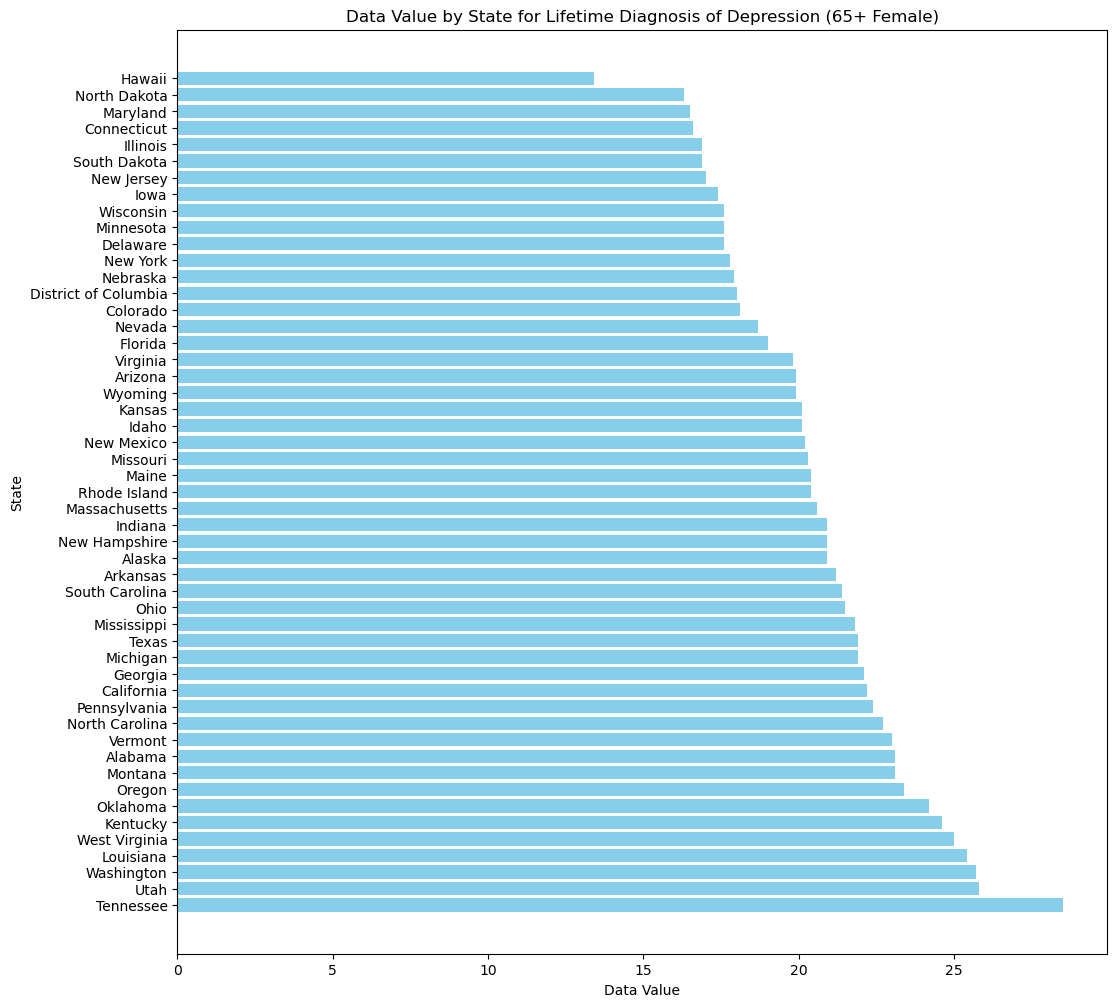

In [26]:
# Filter the dataframe for the specified conditions
filtered_df = df_mental_h[
    (df_mental_h['Age_group'] == '65 years or older') &
    (df_mental_h['Stratification2'] == 'Female') &
    (df_mental_h['Topic'] == 'Lifetime diagnosis of depression')
]

# Sort the dataframe by Data_Value in order
filtered_df_sorted = filtered_df.sort_values(by='Data_Value', ascending=False)

# Plot the results as a horizontal bar plot
plt.figure(figsize=(12, 12))
plt.barh(filtered_df_sorted['State'], filtered_df_sorted['Data_Value'], color='skyblue')
plt.xlabel('Data Value')
plt.ylabel('State')
plt.title('Data Value by State for Lifetime Diagnosis of Depression (65+ Female)')
plt.show()


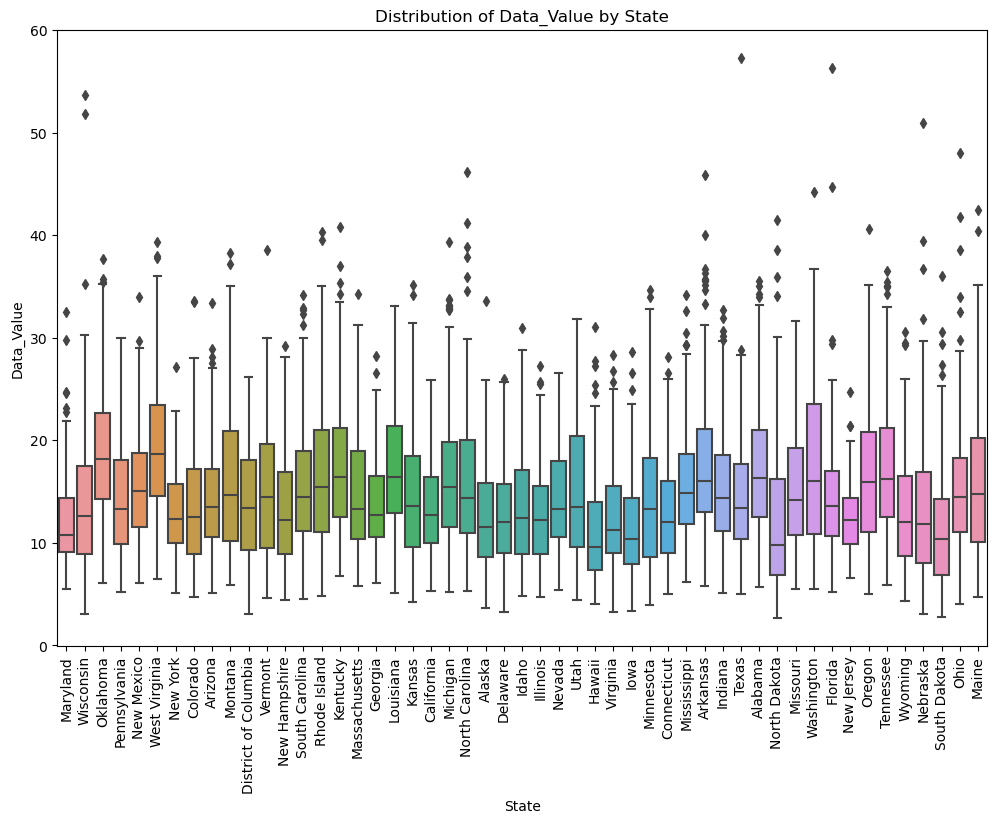

In [27]:
# Boxplot for Data_Value by State
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_mental_h, x='State', y='Data_Value')
plt.xticks(rotation=90)
plt.title('Distribution of Data_Value by State')
plt.show()

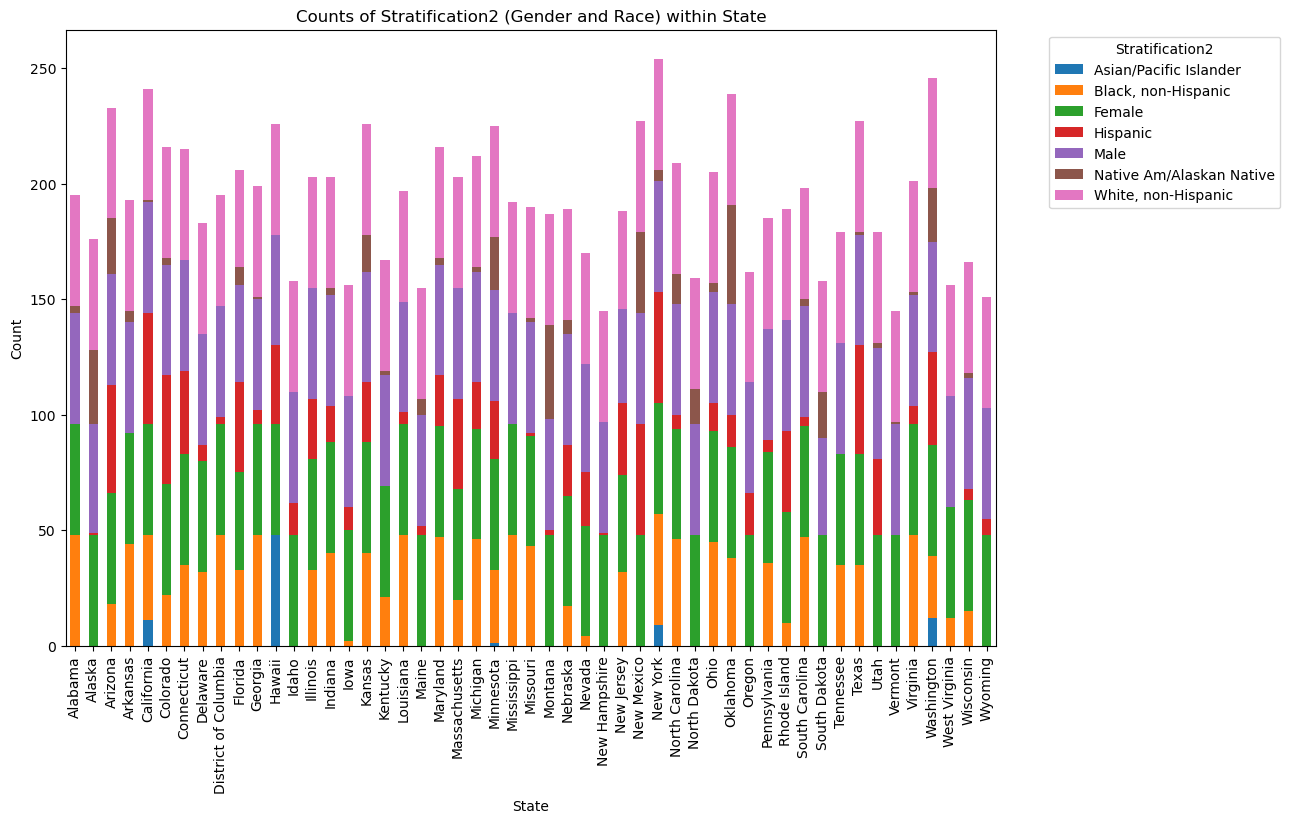

In [28]:
# Stacked bar plot for Stratification2 within State
strat_counts = df_mental_h.groupby(['State', 'Stratification2']).size().unstack(fill_value=0)
strat_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Counts of Stratification2 (Gender and Race) within State')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='Stratification2', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

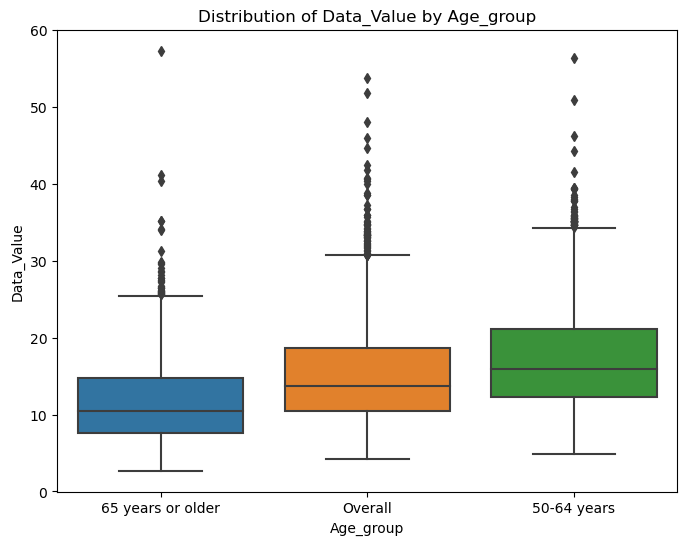

In [29]:
# Boxplot for Data_Value by Age_group
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_mental_h, x='Age_group', y='Data_Value')
plt.title('Distribution of Data_Value by Age_group')
plt.show()

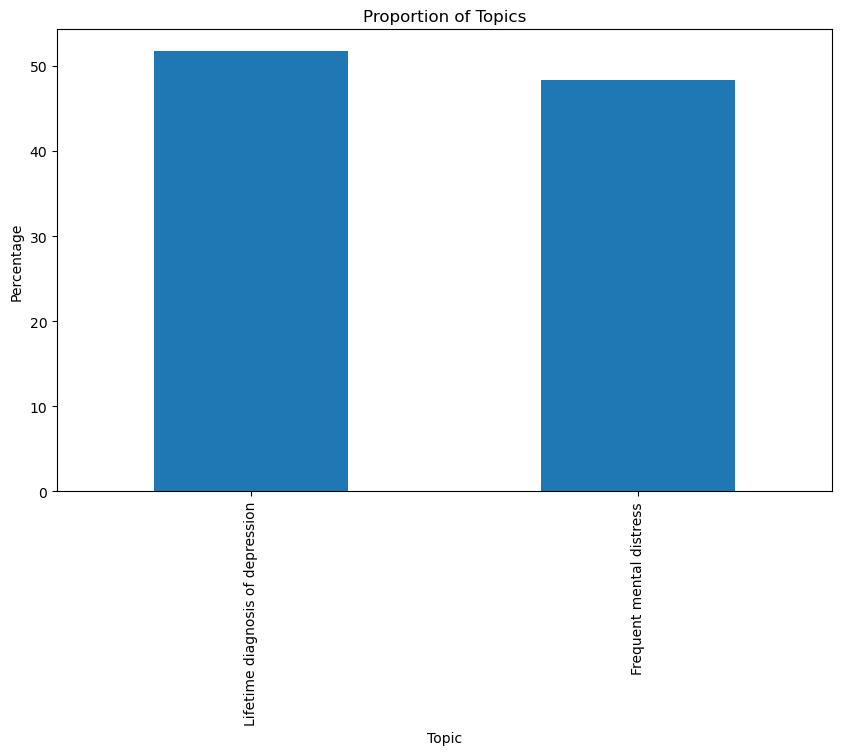

In [30]:
# Bar plot for proportion of Topics
topic_counts = df_mental_h['Topic'].value_counts(normalize=True) * 100
topic_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Proportion of Topics')
plt.xlabel('Topic')
plt.ylabel('Percentage')
plt.show()


In [31]:
df['Data_Value'].describe()

count    126115.000000
mean         37.926636
std          25.332102
min           1.000000
25%          16.100000
50%          33.000000
75%          57.400000
max          99.900000
Name: Data_Value, dtype: float64

In [32]:
# Sorting the DataFrame by 'Data_Value' in descending order
df_sorted = df.sort_values(by='Data_Value', ascending=True)
df_sorted.head(50)

,YearStart,YearEnd,State,Class,Topic,Question,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Age_group,Stratification2,StratificationCategoryID2
190901,2017,2017,Mississippi,Smoking and Alcohol Use,Binge drinking within past 30 days,Percentage of older adults who reported binge ...,Percentage,1.0,0.6,1.7,65 years or older,Female,GENDER
100493,2020,2020,Alabama,Smoking and Alcohol Use,Binge drinking within past 30 days,Percentage of older adults who reported binge ...,Percentage,1.1,0.6,1.9,65 years or older,Female,GENDER
120146,2017,2017,Arkansas,Smoking and Alcohol Use,Binge drinking within past 30 days,Percentage of older adults who reported binge ...,Percentage,1.1,0.6,2.0,65 years or older,Female,GENDER
224536,2019,2019,Oklahoma,Smoking and Alcohol Use,Binge drinking within past 30 days,Percentage of older adults who reported binge ...,Percentage,1.1,0.6,1.9,65 years or older,Female,GENDER
262787,2016,2016,Utah,Smoking and Alcohol Use,Binge drinking within past 30 days,Percentage of older adults who reported binge ...,Percentage,1.2,0.7,1.9,65 years or older,Female,GENDER
100702,2020,2020,Mississippi,Smoking and Alcohol Use,Binge drinking within past 30 days,Percentage of older adults who reported binge ...,Percentage,1.2,0.7,2.0,65 years or older,Female,GENDER
231737,2017,2017,Oklahoma,Smoking and Alcohol Use,Binge drinking within past 30 days,Percentage of older adults who reported binge ...,Percentage,1.3,0.8,2.1,65 years or older,Female,GENDER
99647,2020,2020,Utah,Smoking and Alcohol Use,Binge drinking within past 30 days,Percentage of older adults who reported binge ...,Percentage,1.3,0.7,2.2,65 years or older,Female,GENDER
123465,2015,2015,Alabama,Smoking and Alcohol Use,Binge drinking within past 30 days,Percentage of older adults who reported binge ...,Percentage,1.3,0.8,2.0,65 years or older,Female,GENDER
275287,2019,2019,West Virginia,Smoking and Alcohol Use,Binge drinking within past 30 days,Percentage of older adults who reported binge ...,Percentage,1.3,0.7,2.1,65 years or older,Female,GENDER


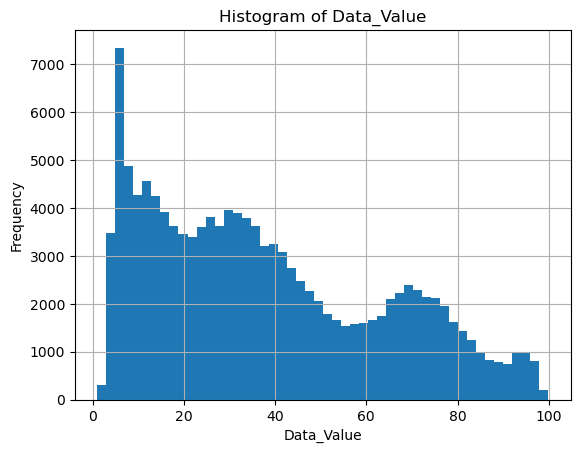

In [33]:
#a visual representation of the distribution of Data_Value
df['Data_Value'].hist(bins=50)
plt.xlabel('Data_Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data_Value')
plt.show()

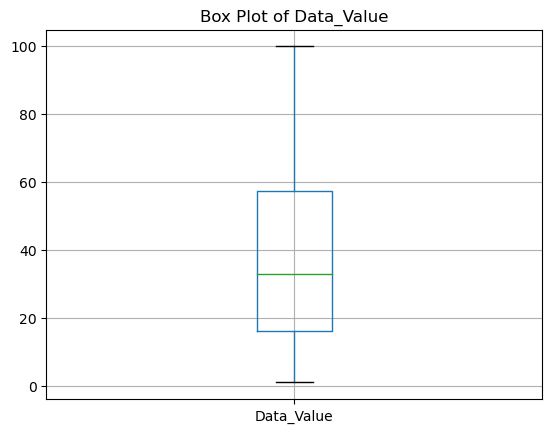

In [34]:
#A box plot to show the spread, median, and potential outliers in the data.
df.boxplot(column='Data_Value')
plt.title('Box Plot of Data_Value')
plt.show()

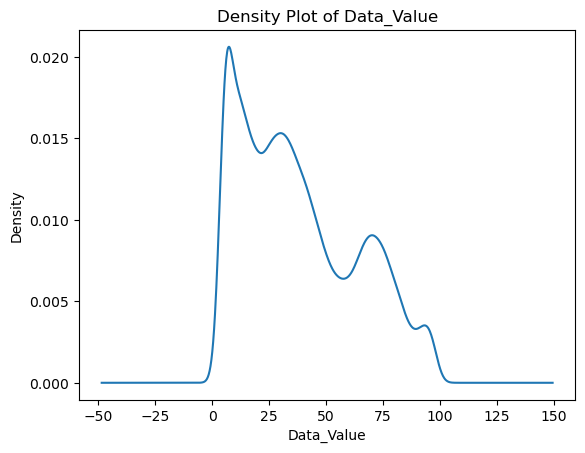

In [35]:
df['Data_Value'].plot(kind='kde')
plt.title('Density Plot of Data_Value')
plt.xlabel('Data_Value')
plt.show()

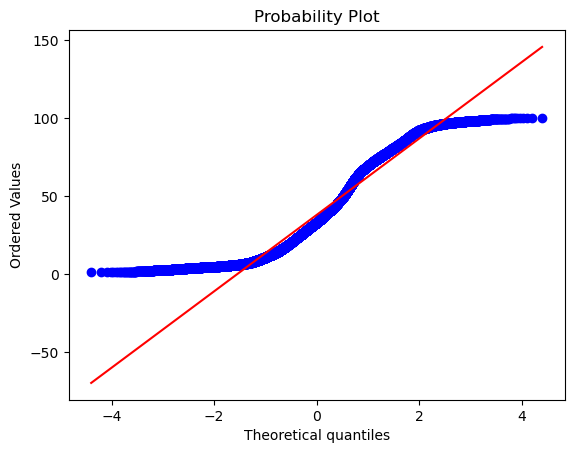

In [36]:
#the distribution of Data_Value to a normal distribution to see how closely it follows a normal distribution.
import scipy.stats as stats
stats.probplot(df['Data_Value'].dropna(), dist="norm", plot=plt)
plt.show()

In [37]:
df.reset_index(drop=True, inplace=True)

In [38]:
#save file
df.to_csv('cleaned_alzh_data.csv', index=False)

### Summary of Data wrangling

**Initial Dataset:**
- The dataset initially consisted of 284,142 rows and 31 columns.
- Key columns included `RowId`, `YearStart`, `YearEnd`, `LocationDesc`, `Topic`, `Question`, `Data_Value`, `Stratification2`, and various other stratification and metadata columns.
- Significant missing values were found in `Data_Value`, `Low_Confidence_Limit`, `High_Confidence_Limit`, and several stratification columns.

**Data Cleaning and Reduction:**
- **Columns Removed:** Several columns were removed because they either contained redundant information or had a high percentage of missing values that could compromise the analysis. These include `Data_Value_Footnote_Symbol`, `Data_Value_Footnote`, `Geolocation`, and others that were not essential for the analysis.
- **Rows Removed:** Rows with missing `Data_Value` and confidence limits were excluded to ensure the integrity of the statistical analysis. This led to a reduction from 284,142 to 126,115 rows, representing approximately 44.4% of the original data.

**Issues Identified and Remedial Actions:**
- **Missing Data:** The significant missing data in several critical columns prompted the decision to remove these rows to maintain the dataset's quality.
- **Stratification Consistency:** Discrepancies in stratification categories and identifiers were resolved to maintain uniformity in groupings.
- **Data Integrity:** Ensured that key variables such as `Data_Value`, `Low_Confidence_Limit`, and `High_Confidence_Limit` were consistently non-null across the dataset.

**Current Dataset:**
- After cleaning, the dataset now includes 126,115 entries with 13 columns.
- Key columns retained are `YearStart`, `YearEnd`, `State`, `Class`, `Topic`, `Question`, `Data_Value_Type`, `Data_Value`, `Low_Confidence_Limit`, `High_Confidence_Limit`, `Age_group`, `Stratification2`, and `StratificationCategoryID2`.
- The cleaned dataset is now ready for further exploratory data analysis and modeling, focusing on understanding the patterns and insights related to mental health topics.
